# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Satriana
- **Email:** satriana123028@gmail.com
- **ID Dicoding:** satriana

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Berdasarkan RFM (Recency, Frequency, Monetary) Analysis bagaimana segmentasi pelanggan?
- Pertanyaan 2 : Segmen pelanggan yang mana yang memberi kontribusi pendapatan terbesar?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

pada tahap ini dilakukan pengumpulan data yang di ambil dari E-Commerce Public Dataset, yaitu:

*   customers_dataset.csv : berisi data pelanggan
*   orders_dataset.csv : berisi data pesanan
*   order_items_dataset.csv : berisi detail iteam pada setiap pesanan





In [4]:
customers_df = pd.read_csv('customers_dataset.csv')
orders_df = pd.read_csv('orders_dataset.csv')
order_items_df = pd.read_csv('order_items_dataset.csv')

**Insight:**
- Dataset terdiri dari beberapa tabel yang saling berelasi menggunakan customer_id dan order_id.

- Data transaksi tersebar dalam beberapa file sehingga perlu dilakukan penggabungan.

### Assessing Data

Pada tahap ini dilakukan untuk mengevaluasi kualitas ada untuk dapat di lakukan analisis lebih lanjut

In [5]:
customers_df.info()
orders_df.info()
order_items_df.info()

customers_df.isna().sum()
orders_df.isna().sum()
order_items_df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


**Insight:**
- Customers dataset dan order items dataset tidak memiliki missing value.

- Orders dataset memiliki missing value pada beberapa kolom tanggal yang berkaitan dengan status pengiriman pesanan.

- Seluruh kolom bertipe tanggal masih perlu dikonversi ke format datetime pada tahap data cleaning.

### Cleaning Data

Melakukan pembersihan data yang meliputi

*   Konversi kolom tanggal ke format datetime
*   Menggabungkan dataset
*   Menghapus kolom yang tidak relevan





In [6]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

merged_df = orders_df.merge(customers_df, on='customer_id')
merged_df = merged_df.merge(order_items_df, on='order_id')

merged_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


**Insight:**
- dataset siap digunakan untuk analisis lanjutan
- Seluruh data transaksi telah tergabung dalam satu dataframe utama

## Exploratory Data Analysis (EDA)

### Explorasi Data Transaksi

Analisis awal yang dilakukan guna memahami gambaran utama dari data transaksi setelah proses penggabungan dataset

In [7]:
total_orders = merged_df['order_id'].nunique()
total_customers = merged_df['customer_unique_id'].nunique()
total_revenue = merged_df['price'].sum

total_customers, total_orders, total_revenue

(95420,
 98666,
 <bound method Series.sum of 0          29.99
 1         118.70
 2         159.90
 3          45.00
 4          19.90
            ...  
 112645    174.90
 112646    205.99
 112647    179.99
 112648    179.99
 112649     68.50
 Name: price, Length: 112650, dtype: float64>)

**Insight:**
- Dataset mencakup lebih dari 95.000 pelanggan unik dengan hampir 100 ribu pesanan
- Total pendapatan dihitung berdasarkan harga produk (price) tanpa memasukkan biaya pengiriman (freight_value)
- Struktur data transaksi sudah sesuai untuk dilakukan analsis lanjutan seperti RFM Anlysis

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berdasarkan RFM (Recency, Frequency, Monetary) Analysis bagaimana segmentasi pelanggan?


Karena distribusi nilai frequency dan monetary sangat timpang serta memiliki banyak
nilai yang sama, dilakukan proses ranking sebelum pembagian kuantil. Pendekatan ini
digunakan untuk memastikan proses RFM Analysis tetap stabil tanpa menghilangkan data
dan tanpa menggunakan algoritma machine learning.


In [16]:
# RFM Analysis

snapshot_date = merged_df['order_purchase_timestamp'].max() + dt.timedelta(days=1)

rfm_df = merged_df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days,
    'order_id': 'nunique',
    'price': 'sum'
}).reset_index()

rfm_df.columns = ['customer_unique_id', 'recency', 'frequency', 'monetary']


# Recency masih aman langsung qcut
rfm_df['R_rank'] = pd.qcut(rfm_df['recency'], 4, labels=[4, 3, 2, 1])

# Frequency dan Monetary: ranking dulu, baru qcut
rfm_df['F_rank'] = pd.qcut(
    rfm_df['frequency'].rank(method='first'),
    q=4,
    labels=[1, 2, 3, 4]
)

rfm_df['M_rank'] = pd.qcut(
    rfm_df['monetary'].rank(method='first'),
    q=4,
    labels=[1, 2, 3, 4]
)

rfm_df['RFM_Score'] = rfm_df[['R_rank', 'F_rank', 'M_rank']].astype(int).sum(axis=1)

rfm_df.head()

,customer_unique_id,recency,frequency,monetary,R_rank,F_rank,M_rank,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,4,1,3,8
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1,6
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2,4
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1,4
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,4,7


Nilai recency, frequency, dan monetary yang digunakan dalam analisis merupakan nilai
asli hasil agregasi transaksi. Proses ranking hanya digunakan untuk membantu pembagian
kuantil pada tahap scoring RFM dan tidak mengubah nilai metrik aslinya.


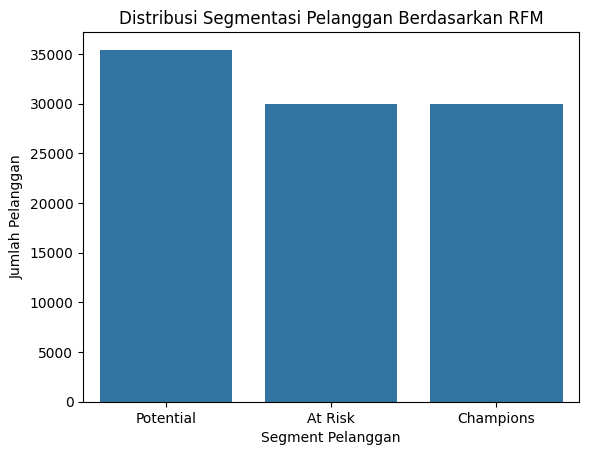

In [17]:
def segment_rfm(score):
  if score >= 9:
    return 'Champions'
  elif score >= 7:
    return 'Potential'
  else:
    return 'At Risk'


rfm_df['Segment'] = rfm_df['RFM_Score'].apply(segment_rfm)

plt.figure()
sns.countplot(x='Segment', data=rfm_df)
plt.title('Distribusi Segmentasi Pelanggan Berdasarkan RFM')
plt.xlabel('Segment Pelanggan')
plt.ylabel('Jumlah Pelanggan')
plt.show()


### Pertanyaan 2: Segmen pelanggan yang mana yang memberi kontribusi pendapatan terbesar?

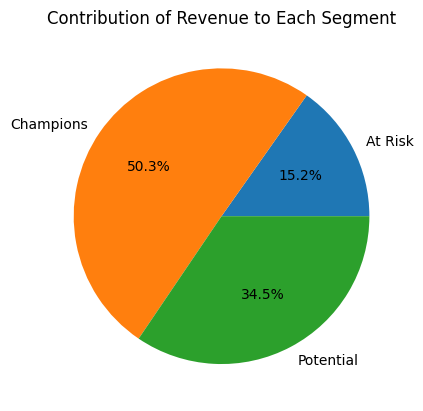

In [14]:
revenue_segment = rfm_df.groupby('Segment')['monetary'].sum().reset_index()

plt.figure()
plt.pie(revenue_segment['monetary'], labels=revenue_segment['Segment'], autopct='%1.1f%%')
plt.title('Contribution of Revenue to Each Segment')
plt.show()


**Insight:**
- Segmen Champions memberi kontribusi pendapatan terbesar dibandingkan dengan segmen yang lain
- Segmen At Risk memiliki kontribusi pendapatan paling rendah meskipun jumlah pelanggannya cukup signifikan

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1: Berdasarkan RFM Analysis, pelanggan dapat dikelompokkan ke dalam tiga segmen utama, yaitu Champions, POtential, dan Ai Risk
- Conclution pertanyaan 2: Segmen Champions penyumbang pendapatan terbesar sehingga perlu dipertahankan melalui strategi loyalitas pelanggan